In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-12 12:08:57.892718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [3]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## Create Combine Model idle activity

## iPhone13_II and iPhone_III

In [5]:
class_label = 2
for i in range(class_label):

    #folder_path = "/Users/Lojenaa/Documents/PhD/Smartphones/EM_Signals/iPhone_13/"

    if(i==0):
        data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/idle.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:
        data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_III/idle.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
    
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_II&III_idle.csv', header=False)

[0.0078125+0.0078125j 0.       +0.0078125j 0.015625 +0.0078125j ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.j       ]
2048
71756
(2048, 71756)
[0.01843879 0.00944655 0.00375897 ... 0.00207559 0.00387582 0.00955302]
(10000, 2048)
(10000,)
[0.015625 +0.015625j  0.0078125+0.0078125j 0.0234375+0.0078125j ...
 0.015625 +0.015625j  0.015625 +0.0078125j 0.0078125+0.0078125j]
2048
69895
(2048, 69895)
[0.01831148 0.00957138 0.00356465 ... 0.00186656 0.00368411 0.00954022]
(20000, 2048)
(20000,)


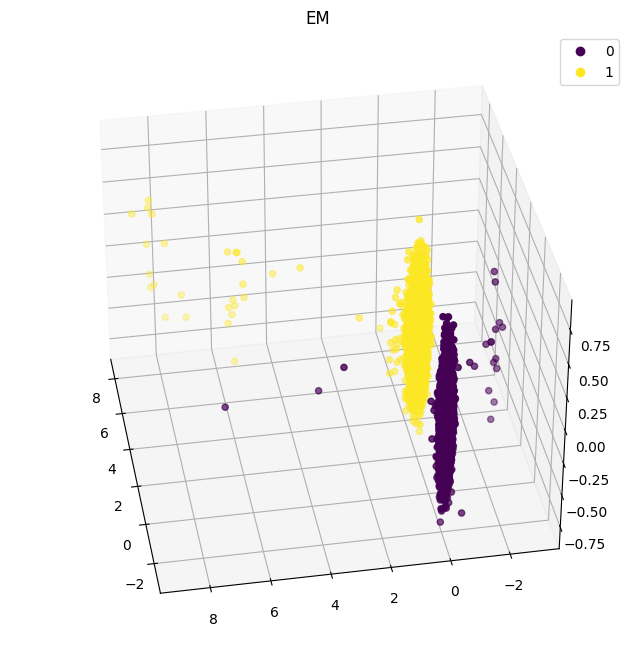

In [6]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_II&III_idle_scatter.pdf')

In [21]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_II&III_idle.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.471973,0.745750,1.000000,1.000000,1.000000,1.000000,0.842777,0.447068,0.403497,0.494970,...,0.679062,0.778183,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.742923,0.0
2,0.949391,0.938956,0.098948,0.265025,0.350172,0.573138,0.363544,0.233301,0.377631,0.446334,...,0.483565,0.426349,0.434964,0.252328,0.145410,0.122301,0.013793,0.090580,0.943361,0.0
3,0.929018,0.927703,0.082159,0.124108,0.097817,0.285197,0.174640,0.057605,0.175945,0.293588,...,0.188279,0.219561,0.286815,0.333964,0.541473,0.216802,0.066178,0.027207,0.885455,0.0
4,0.902246,0.842409,0.205673,0.254807,0.271615,0.499410,0.295975,0.121008,0.174244,0.590062,...,0.249834,0.151353,0.070498,0.192630,0.409747,0.232707,0.111417,0.053319,0.911944,0.0
5,0.874453,0.833250,0.024017,0.030917,0.103080,0.411925,0.409172,0.122752,0.119534,0.243648,...,0.139018,0.071060,0.093149,0.005741,0.105638,0.076555,0.040052,0.021592,0.854297,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.945051,0.922413,0.066396,0.138517,0.286974,0.451240,0.492196,0.405909,0.294174,0.479099,...,0.146889,0.302001,0.487408,0.222404,0.204962,0.396590,0.332345,0.083401,0.903594,1.0
19997,0.944990,0.913927,0.056953,0.142559,0.080892,0.131274,0.239786,0.134853,0.105656,0.373636,...,0.110400,0.113427,0.178224,0.269530,0.144817,0.084903,0.104175,0.089864,0.886584,1.0
19998,0.945708,0.921954,0.043915,0.129707,0.070167,0.116501,0.170065,0.134889,0.173249,0.340199,...,0.297505,0.182439,0.158413,0.216094,0.092778,0.043529,0.059891,0.048301,0.886732,1.0
19999,0.951418,0.885724,0.031138,0.108556,0.140773,0.147233,0.405158,0.301385,0.369300,0.272471,...,0.327216,0.312142,0.111449,0.218895,0.230418,0.300778,0.336697,0.228233,0.970395,1.0


In [22]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

In [7]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_8 (Dense)             (None, 800)               1120800   
                                                                 
 dense_9 (Dense)             (None, 500)               400500    
                                                                 
 dense_10 (Dense)            (None, 200)               100200    
                                                                 
 dense_11 (Dense)            (None, 100)               20100     
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 2)                

In [10]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [11]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/iPHONE13_II&III_idle_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
507/507 [==============================] - 7s 13ms/step - loss: 0.4325 - accuracy: 0.9193 - val_loss: 0.1805 - val_accuracy: 1.0000
Epoch 2/25
507/507 [==============================] - 6s 11ms/step - loss: 0.0838 - accuracy: 0.9990 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 3/25
507/507 [==============================] - 7s 14ms/step - loss: 0.0240 - accuracy: 0.9990 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 4/25
507/507 [==============================] - 6s 12ms/step - loss: 0.0131 - accuracy: 0.9990 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 5/25
507/507 [==============================] - 6s 13ms/step - loss: 0.0093 - accuracy: 0.9990 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 6/25
507/507 [==============================] - 6s 12ms/step - loss: 0.0074 - accuracy: 0.9991 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/25
507/507 [==============================] - 6s 11ms/step - loss: 0.0064 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 1.0000

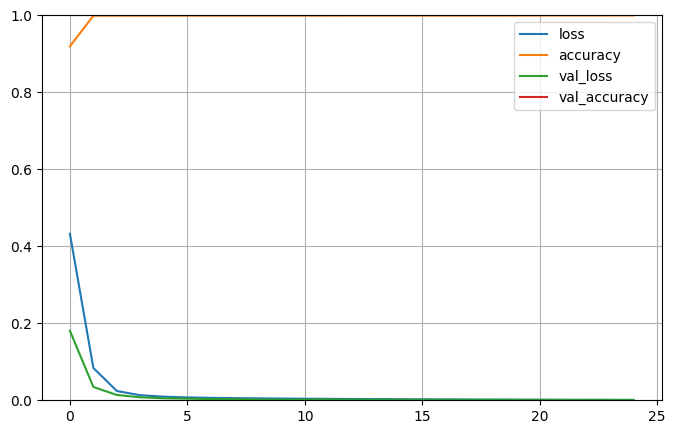

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the own iPhone13_I model

In [13]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/iPHONE13_II&III_idle_model.h5")

In [14]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

63/63 [==============================] - 1s 5ms/step - loss: 6.5133e-04 - accuracy: 1.0000
test loss, test acc: [0.0006513295811600983, 1.0]


In [15]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

63/63 [==============================] - 0s 5ms/step
[1 0 1 ... 0 0 1]
1


In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 985    0]
 [   0 1015]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00      1015

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Test Accuracy:1.0


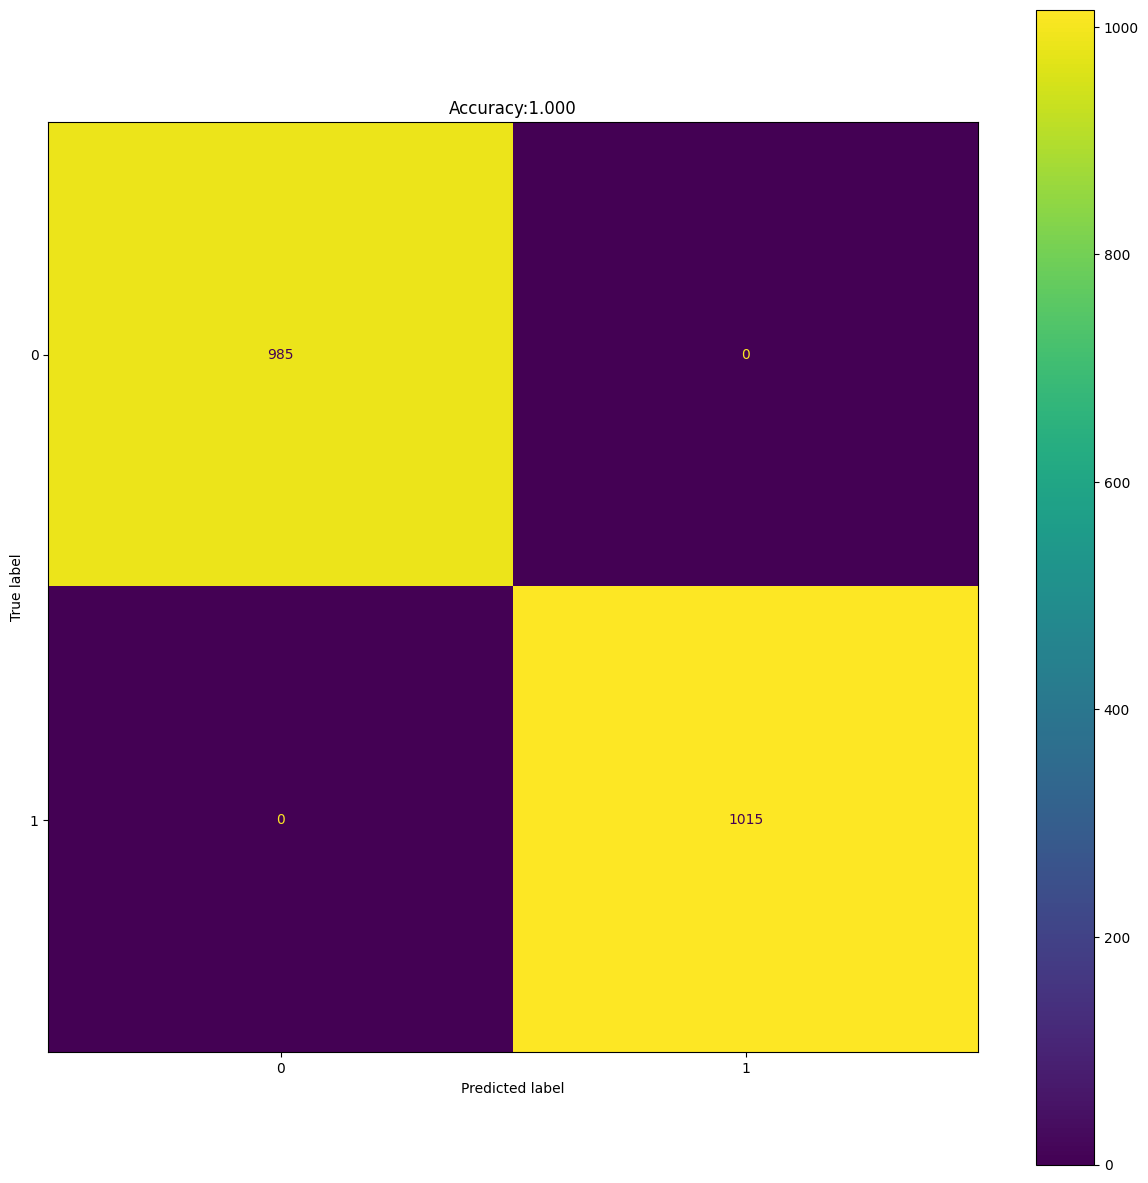

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## iPhone13_I and iPhone_II

In [18]:
class_label = 2
for i in range(class_label):

    #folder_path = "/Users/Lojenaa/Documents/PhD/Smartphones/EM_Signals/iPhone_13/"

    if(i==0):
        data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/idle.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:
        data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/idle.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
    
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I&II_idle.csv', header=False)

[0.015625 +0.015625j  0.0234375+0.0078125j 0.       -0.0078125j ...
 0.015625 +0.j        0.015625 +0.0078125j 0.       +0.0078125j]
2048
80022
(2048, 80022)
[0.01823433 0.00957463 0.0036588  ... 0.00179094 0.00355725 0.00951913]
0
(10000, 2048)
(10000,)
[0.0078125+0.0078125j 0.       +0.0078125j 0.015625 +0.0078125j ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.j       ]
2048
71756
(2048, 71756)
[0.01843879 0.00944655 0.00375897 ... 0.00207559 0.00387582 0.00955302]
1
(20000, 2048)
(20000,)


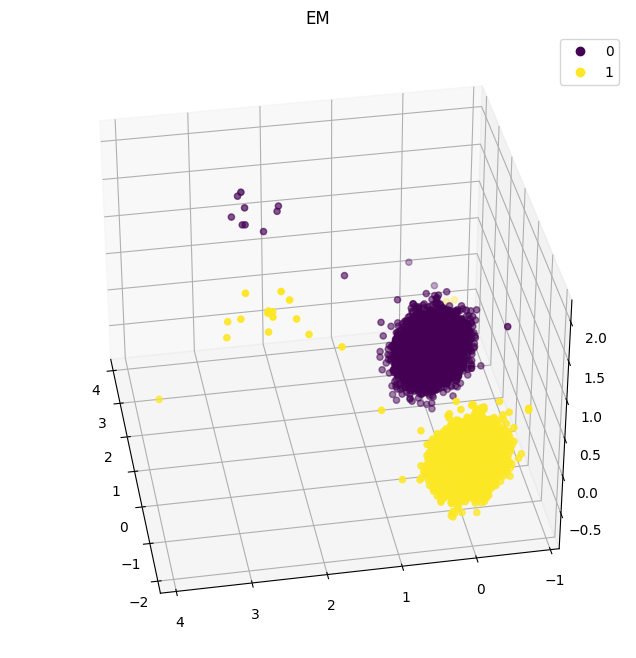

In [19]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I&II_idle_scatter.pdf')

Build iPhone13_II Model

In [7]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I&II_idle.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.444181,0.681939,0.917766,0.855525,0.850324,0.762727,1.000000,0.793504,0.752856,0.718966,...,0.621179,0.863333,0.814431,0.652140,0.850461,1.000000,0.921047,0.922909,0.683446,0.0
2,0.940975,0.902278,0.041669,0.095891,0.295372,0.374562,0.266161,0.092353,0.259659,0.235810,...,0.245387,0.059623,0.321747,0.318649,0.222850,0.134803,0.068008,0.065761,0.914293,0.0
3,0.938454,0.875920,0.047072,0.020352,0.164483,0.226344,0.095324,0.114219,0.040691,0.277718,...,0.306711,0.242438,0.333477,0.256358,0.164736,0.160048,0.190011,0.073060,0.910616,0.0
4,0.939275,0.899149,0.054119,0.026045,0.164039,0.249506,0.219210,0.242294,0.391482,0.349604,...,0.241613,0.089987,0.263450,0.207532,0.468121,0.293544,0.116904,0.028481,0.888085,0.0
5,0.960394,0.943189,0.161481,0.294956,0.250711,0.314031,0.391233,0.159782,0.014373,0.243701,...,0.253489,0.290995,0.188679,0.079437,0.290610,0.176227,0.078194,0.079799,0.893242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.897169,0.901271,0.055051,0.139007,0.144712,0.146639,0.150577,0.158558,0.051923,0.346781,...,0.262470,0.307229,0.153728,0.114929,0.273826,0.239433,0.146409,0.055355,0.854149,1.0
19997,0.928083,0.913778,0.010262,0.041901,0.118606,0.365635,0.163472,0.091420,0.056965,0.218787,...,0.164467,0.200790,0.055529,0.368137,0.350594,0.299587,0.172214,0.139143,0.857092,1.0
19998,0.919804,0.867085,0.080702,0.044551,0.109014,0.232389,0.138455,0.176115,0.428544,0.457756,...,0.221266,0.096448,0.235825,0.161754,0.239716,0.267919,0.235618,0.078527,0.905875,1.0
19999,0.908652,0.876112,0.070981,0.024955,0.143026,0.231891,0.177758,0.076263,0.086839,0.134502,...,0.330012,0.279206,0.244549,0.197689,0.178525,0.078165,0.063766,0.069901,0.887090,1.0


In [8]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

In [20]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_15 (Dense)            (None, 800)               1120800   
                                                                 
 dense_16 (Dense)            (None, 500)               400500    
                                                                 
 dense_17 (Dense)            (None, 200)               100200    
                                                                 
 dense_18 (Dense)            (None, 100)               20100     
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 2)                

In [22]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/iPHONE13_I&II_idle_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
507/507 [==============================] - 7s 13ms/step - loss: 0.5818 - accuracy: 0.8224 - val_loss: 0.4271 - val_accuracy: 0.9989
Epoch 2/25
507/507 [==============================] - 5s 9ms/step - loss: 0.2493 - accuracy: 0.9994 - val_loss: 0.1109 - val_accuracy: 1.0000
Epoch 3/25
507/507 [==============================] - 5s 10ms/step - loss: 0.0616 - accuracy: 0.9999 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 4/25
507/507 [==============================] - 5s 10ms/step - loss: 0.0220 - accuracy: 0.9999 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 5/25
507/507 [==============================] - 5s 9ms/step - loss: 0.0117 - accuracy: 0.9999 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 6/25
507/507 [==============================] - 5s 10ms/step - loss: 0.0076 - accuracy: 0.9999 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 7/25
507/507 [==============================] - 5s 10ms/step - loss: 0.0056 - accuracy: 0.9999 - val_loss: 0.0042 - val_accuracy: 1.0000
E

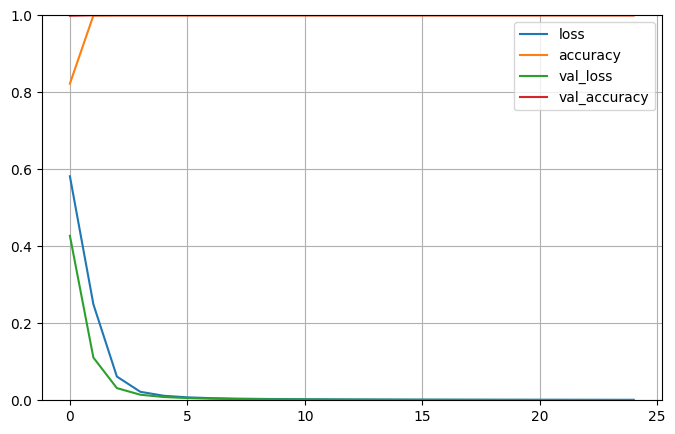

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the Own iPhone13_II Model

In [26]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/iPHONE13_I&II_idle_model.h5")

In [27]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

63/63 [==============================] - 1s 8ms/step - loss: 0.0066 - accuracy: 0.9990
test loss, test acc: [0.006636279635131359, 0.9990000128746033]


In [28]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

63/63 [==============================] - 0s 5ms/step
[1 0 1 ... 0 0 1]
1


In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 985    0]
 [   2 1013]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00      1015

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Test Accuracy:0.999


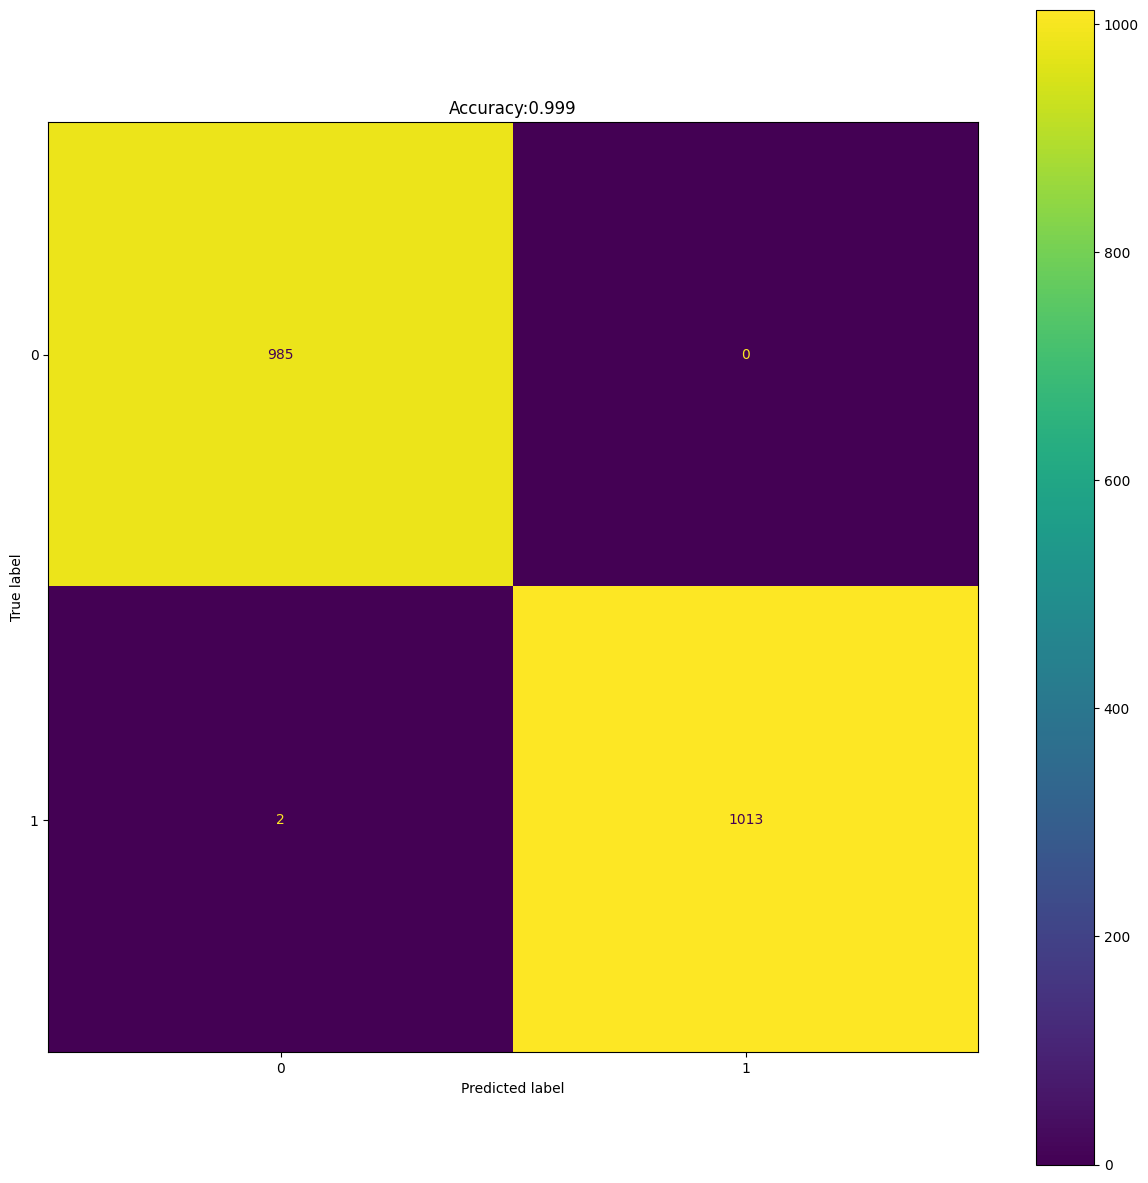

In [30]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## iPhone13_I and iPhone_III

In [31]:
class_label = 2
for i in range(class_label):

    #folder_path = "/Users/Lojenaa/Documents/PhD/Smartphones/EM_Signals/iPhone_13/"

    if(i==0):
        data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/idle.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:
        data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_III/idle.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
    
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I&III_idle.csv', header=False)

[0.015625 +0.015625j  0.0234375+0.0078125j 0.       -0.0078125j ...
 0.015625 +0.j        0.015625 +0.0078125j 0.       +0.0078125j]
2048
80022
(2048, 80022)
[0.01823433 0.00957463 0.0036588  ... 0.00179094 0.00355725 0.00951913]
0
(10000, 2048)
(10000,)
[0.015625 +0.015625j  0.0078125+0.0078125j 0.0234375+0.0078125j ...
 0.015625 +0.015625j  0.015625 +0.0078125j 0.0078125+0.0078125j]
2048
69895
(2048, 69895)
[0.01831148 0.00957138 0.00356465 ... 0.00186656 0.00368411 0.00954022]
1
(20000, 2048)
(20000,)


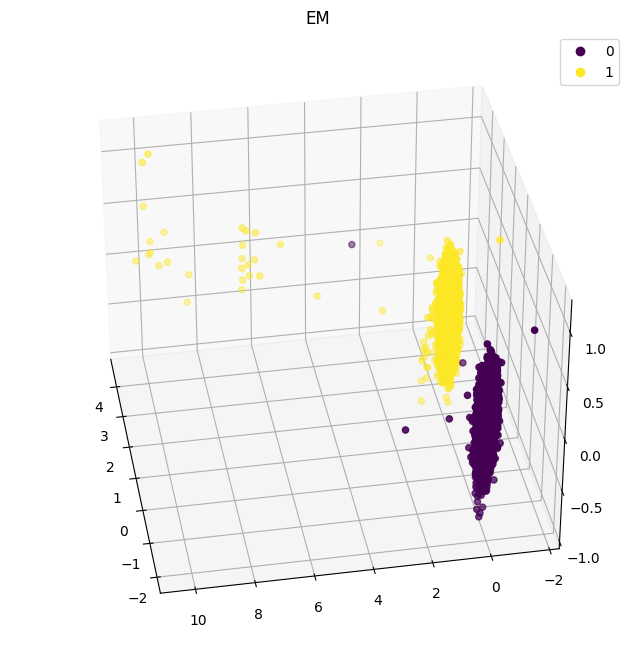

In [32]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I&III_idle_scatter.pdf')

Build an own model for iPhone13_III

In [34]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I&III_idle.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.444181,0.681939,0.917766,0.855525,0.850324,0.762727,1.000000,0.793504,0.752856,0.718966,...,0.621179,0.863333,0.814431,0.652140,0.850461,1.000000,0.921047,0.922909,0.683446,0.0
2,0.940975,0.902278,0.041669,0.095891,0.295372,0.374562,0.266161,0.092353,0.259659,0.235810,...,0.245387,0.059623,0.321747,0.318649,0.222850,0.134803,0.068008,0.065761,0.914293,0.0
3,0.938454,0.875920,0.047072,0.020352,0.164483,0.226344,0.095324,0.114219,0.040691,0.277718,...,0.306711,0.242438,0.333477,0.256358,0.164736,0.160048,0.190011,0.073060,0.910616,0.0
4,0.939275,0.899149,0.054119,0.026045,0.164039,0.249506,0.219210,0.242294,0.391482,0.349604,...,0.241613,0.089987,0.263450,0.207532,0.468121,0.293544,0.116904,0.028481,0.888085,0.0
5,0.960394,0.943189,0.161481,0.294956,0.250711,0.314031,0.391233,0.159782,0.014373,0.243701,...,0.253489,0.290995,0.188679,0.079437,0.290610,0.176227,0.078194,0.079799,0.893242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.945051,0.922413,0.066396,0.138517,0.286974,0.451240,0.492196,0.405909,0.294174,0.479099,...,0.146889,0.302001,0.487408,0.222404,0.204962,0.396590,0.332345,0.083401,0.903594,1.0
19997,0.944990,0.913927,0.056953,0.142559,0.080892,0.131274,0.239786,0.134853,0.105656,0.373636,...,0.110400,0.113427,0.178224,0.269530,0.144817,0.084903,0.104175,0.089864,0.886584,1.0
19998,0.945708,0.921954,0.043915,0.129707,0.070167,0.116501,0.170065,0.134889,0.173249,0.340199,...,0.297505,0.182439,0.158413,0.216094,0.092778,0.043529,0.059891,0.048301,0.886732,1.0
19999,0.951418,0.885724,0.031138,0.108556,0.140773,0.147233,0.405158,0.301385,0.369300,0.272471,...,0.327216,0.312142,0.111449,0.218895,0.230418,0.300778,0.336697,0.228233,0.970395,1.0


In [35]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

In [33]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_22 (Dense)            (None, 800)               1120800   
                                                                 
 dense_23 (Dense)            (None, 500)               400500    
                                                                 
 dense_24 (Dense)            (None, 200)               100200    
                                                                 
 dense_25 (Dense)            (None, 100)               20100     
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 2)                

In [35]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [36]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/iPHONE13_I&III_idle_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
507/507 [==============================] - 8s 15ms/step - loss: 0.5497 - accuracy: 0.8621 - val_loss: 0.3114 - val_accuracy: 1.0000
Epoch 2/25
507/507 [==============================] - 6s 13ms/step - loss: 0.1398 - accuracy: 0.9994 - val_loss: 0.0498 - val_accuracy: 1.0000
Epoch 3/25
507/507 [==============================] - 7s 14ms/step - loss: 0.0316 - accuracy: 0.9994 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 4/25
507/507 [==============================] - 7s 15ms/step - loss: 0.0155 - accuracy: 0.9994 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 5/25
507/507 [==============================] - 7s 14ms/step - loss: 0.0107 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 6/25
507/507 [==============================] - 7s 13ms/step - loss: 0.0087 - accuracy: 0.9994 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 7/25
507/507 [==============================] - 5s 10ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 1.0000

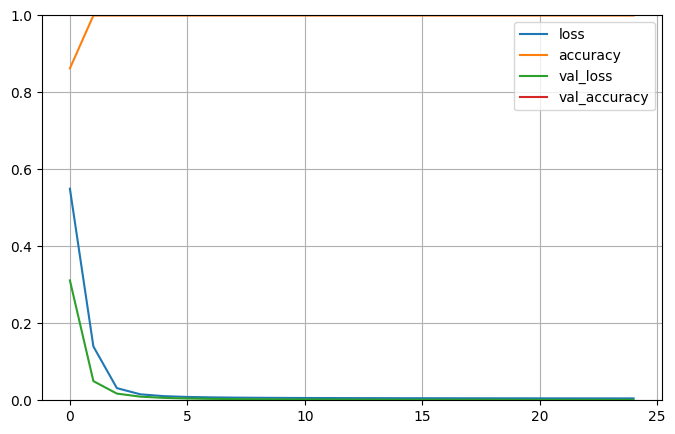

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the own iPhone_III Model

In [38]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/iPHONE13_I&III_idle_model.h5")

In [39]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

63/63 [==============================] - 1s 8ms/step - loss: 0.0046 - accuracy: 0.9995
test loss, test acc: [0.0046442532911896706, 0.9994999766349792]


In [40]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

63/63 [==============================] - 0s 6ms/step
[1 0 1 ... 0 0 1]
1


In [41]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 984    1]
 [   0 1015]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00      1015

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Test Accuracy:0.9995


Text(0.5, 1.0, 'Accuracy:1.000')

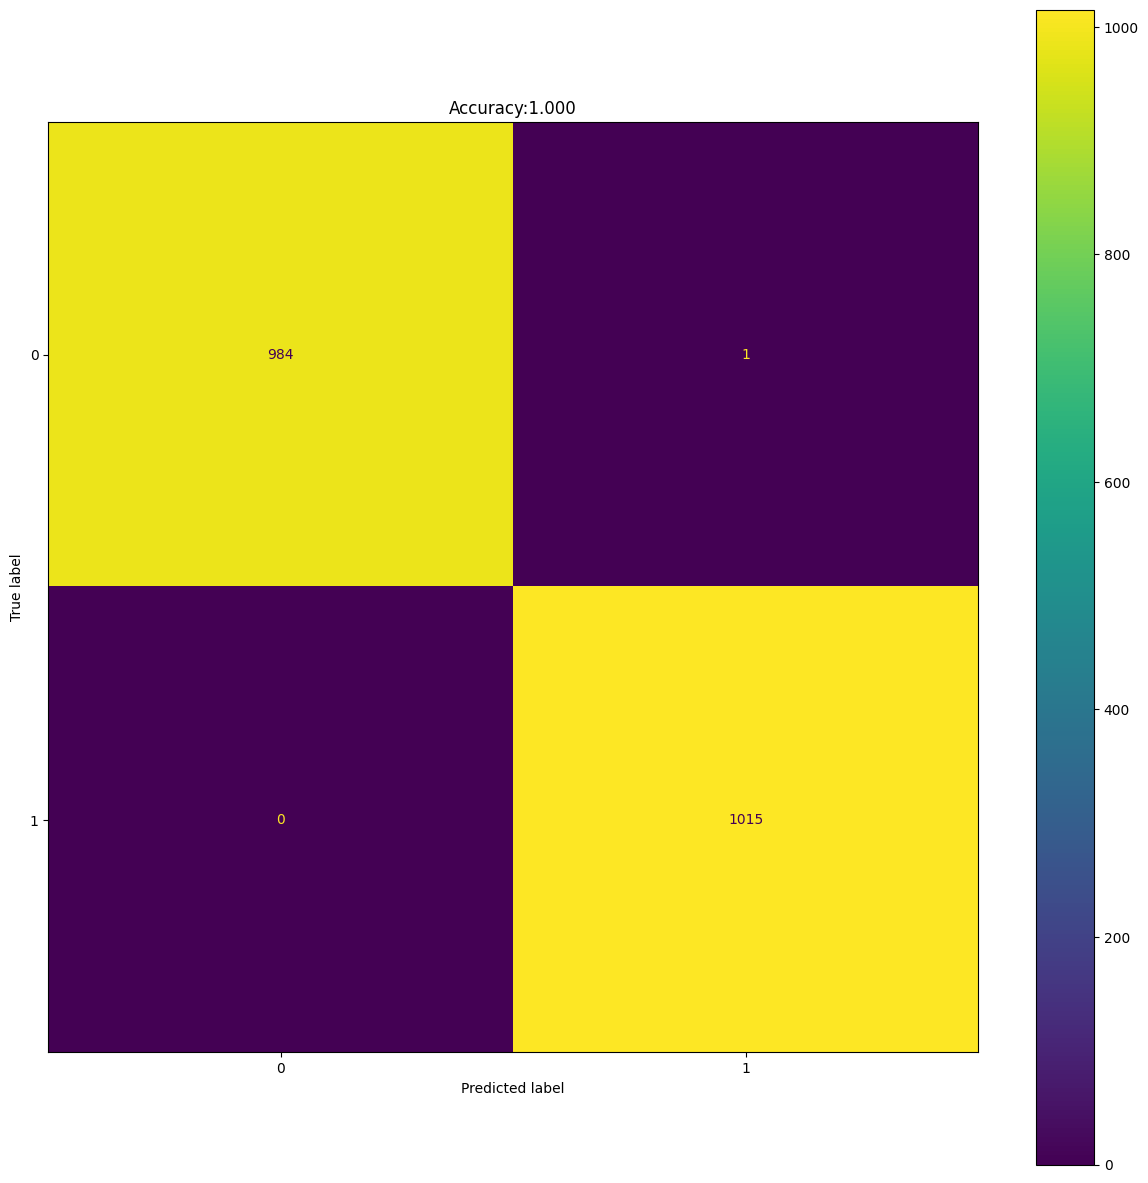

In [42]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## iPhone13_I, iPhone_II, and iPhone_III

In [43]:
class_label = 3
for i in range(class_label):

    #folder_path = "/Users/Lojenaa/Documents/PhD/Smartphones/EM_Signals/iPhone_13/"

    if(i==0):
        data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/idle.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:
        if(i==1):
            data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

        if(i==2):
            data = getData("/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_III/idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I&II&III_idle.csv', header=False)

[0.015625 +0.015625j  0.0234375+0.0078125j 0.       -0.0078125j ...
 0.015625 +0.j        0.015625 +0.0078125j 0.       +0.0078125j]
2048
80022
(2048, 80022)
[0.01823433 0.00957463 0.0036588  ... 0.00179094 0.00355725 0.00951913]
0
(10000, 2048)
(10000,)
[0.0078125+0.0078125j 0.       +0.0078125j 0.015625 +0.0078125j ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.j       ]
2048
71756
(2048, 71756)
[0.01843879 0.00944655 0.00375897 ... 0.00207559 0.00387582 0.00955302]
1
(20000, 2048)
(20000,)
[0.015625 +0.015625j  0.0078125+0.0078125j 0.0234375+0.0078125j ...
 0.015625 +0.015625j  0.015625 +0.0078125j 0.0078125+0.0078125j]
2048
69895
(2048, 69895)
[0.01831148 0.00957138 0.00356465 ... 0.00186656 0.00368411 0.00954022]
2
(30000, 2048)
(30000,)


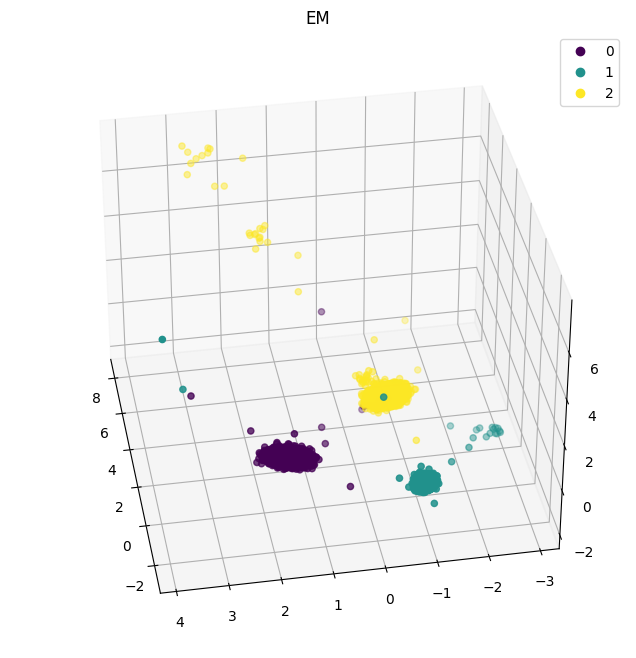

In [44]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/i13_I&II&III_idle_scatter.pdf')

In [50]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I&II&III_idle.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.444181,0.681939,0.917766,0.855525,0.850324,0.762727,1.000000,0.793504,0.752856,0.718966,...,0.621179,0.863333,0.814431,0.652140,0.850461,1.000000,0.921047,0.922909,0.683446,0.0
2,0.940975,0.902278,0.041669,0.095891,0.295372,0.374562,0.266161,0.092353,0.259659,0.235810,...,0.245387,0.059623,0.321747,0.318649,0.222850,0.134803,0.068008,0.065761,0.914293,0.0
3,0.938454,0.875920,0.047072,0.020352,0.164483,0.226344,0.095324,0.114219,0.040691,0.277718,...,0.306711,0.242438,0.333477,0.256358,0.164736,0.160048,0.190011,0.073060,0.910616,0.0
4,0.939275,0.899149,0.054119,0.026045,0.164039,0.249506,0.219210,0.242294,0.391482,0.349604,...,0.241613,0.089987,0.263450,0.207532,0.468121,0.293544,0.116904,0.028481,0.888085,0.0
5,0.960394,0.943189,0.161481,0.294956,0.250711,0.314031,0.391233,0.159782,0.014373,0.243701,...,0.253489,0.290995,0.188679,0.079437,0.290610,0.176227,0.078194,0.079799,0.893242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.945051,0.922413,0.066396,0.138517,0.286974,0.451240,0.492196,0.405909,0.294174,0.479099,...,0.146889,0.302001,0.487408,0.222404,0.204962,0.396590,0.332345,0.083401,0.903594,2.0
29997,0.944990,0.913927,0.056953,0.142559,0.080892,0.131274,0.239786,0.134853,0.105656,0.373636,...,0.110400,0.113427,0.178224,0.269530,0.144817,0.084903,0.104175,0.089864,0.886584,2.0
29998,0.945708,0.921954,0.043915,0.129707,0.070167,0.116501,0.170065,0.134889,0.173249,0.340199,...,0.297505,0.182439,0.158413,0.216094,0.092778,0.043529,0.059891,0.048301,0.886732,2.0
29999,0.951418,0.885724,0.031138,0.108556,0.140773,0.147233,0.405158,0.301385,0.369300,0.272471,...,0.327216,0.312142,0.111449,0.218895,0.230418,0.300778,0.336697,0.228233,0.970395,2.0


In [51]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

In [45]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_29 (Dense)            (None, 800)               1120800   
                                                                 
 dense_30 (Dense)            (None, 500)               400500    
                                                                 
 dense_31 (Dense)            (None, 200)               100200    
                                                                 
 dense_32 (Dense)            (None, 100)               20100     
                                                                 
 dense_33 (Dense)            (None, 50)                5050      
                                                                 
 dense_34 (Dense)            (None, 3)                

In [47]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/iPHONE13_I&II&III_idle_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
760/760 [==============================] - 11s 14ms/step - loss: 0.9782 - accuracy: 0.7190 - val_loss: 0.7476 - val_accuracy: 0.9959
Epoch 2/25
760/760 [==============================] - 8s 11ms/step - loss: 0.3970 - accuracy: 0.9987 - val_loss: 0.1364 - val_accuracy: 0.9996
Epoch 3/25
760/760 [==============================] - 7s 9ms/step - loss: 0.0714 - accuracy: 0.9990 - val_loss: 0.0329 - val_accuracy: 0.9996
Epoch 4/25
760/760 [==============================] - 7s 9ms/step - loss: 0.0266 - accuracy: 0.9990 - val_loss: 0.0154 - val_accuracy: 0.9996
Epoch 5/25
760/760 [==============================] - 7s 9ms/step - loss: 0.0167 - accuracy: 0.9990 - val_loss: 0.0096 - val_accuracy: 0.9996
Epoch 6/25
760/760 [==============================] - 9s 12ms/step - loss: 0.0128 - accuracy: 0.9990 - val_loss: 0.0069 - val_accuracy: 0.9996
Epoch 7/25
760/760 [==============================] - 9s 12ms/step - loss: 0.0108 - accuracy: 0.9990 - val_loss: 0.0054 - val_accuracy: 0.9996
E

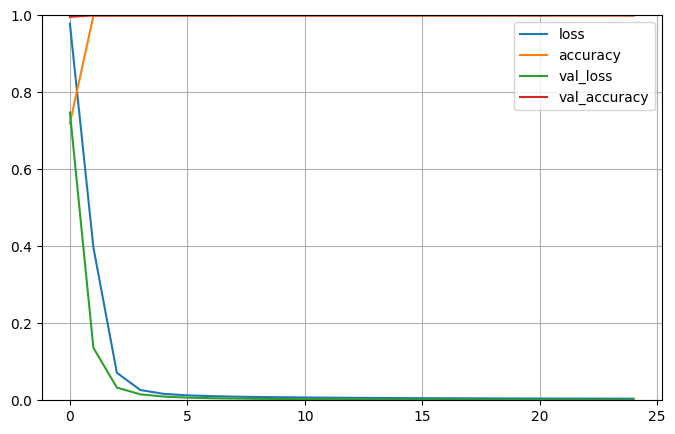

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [50]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_idle/iPHONE13_I&II&III_idle_model.h5")

In [51]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

94/94 [==============================] - 1s 5ms/step - loss: 0.0037 - accuracy: 0.9997
test loss, test acc: [0.003715729108080268, 0.999666690826416]


In [52]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

94/94 [==============================] - 1s 7ms/step
[0 1 0 ... 1 1 2]
0


In [53]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 967    0    1]
 [   0 1003    0]
 [   0    0 1029]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00      1003
           2       1.00      1.00      1.00      1029

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Test Accuracy:0.9996666666666667


Text(0.5, 1.0, 'Accuracy:1.000')

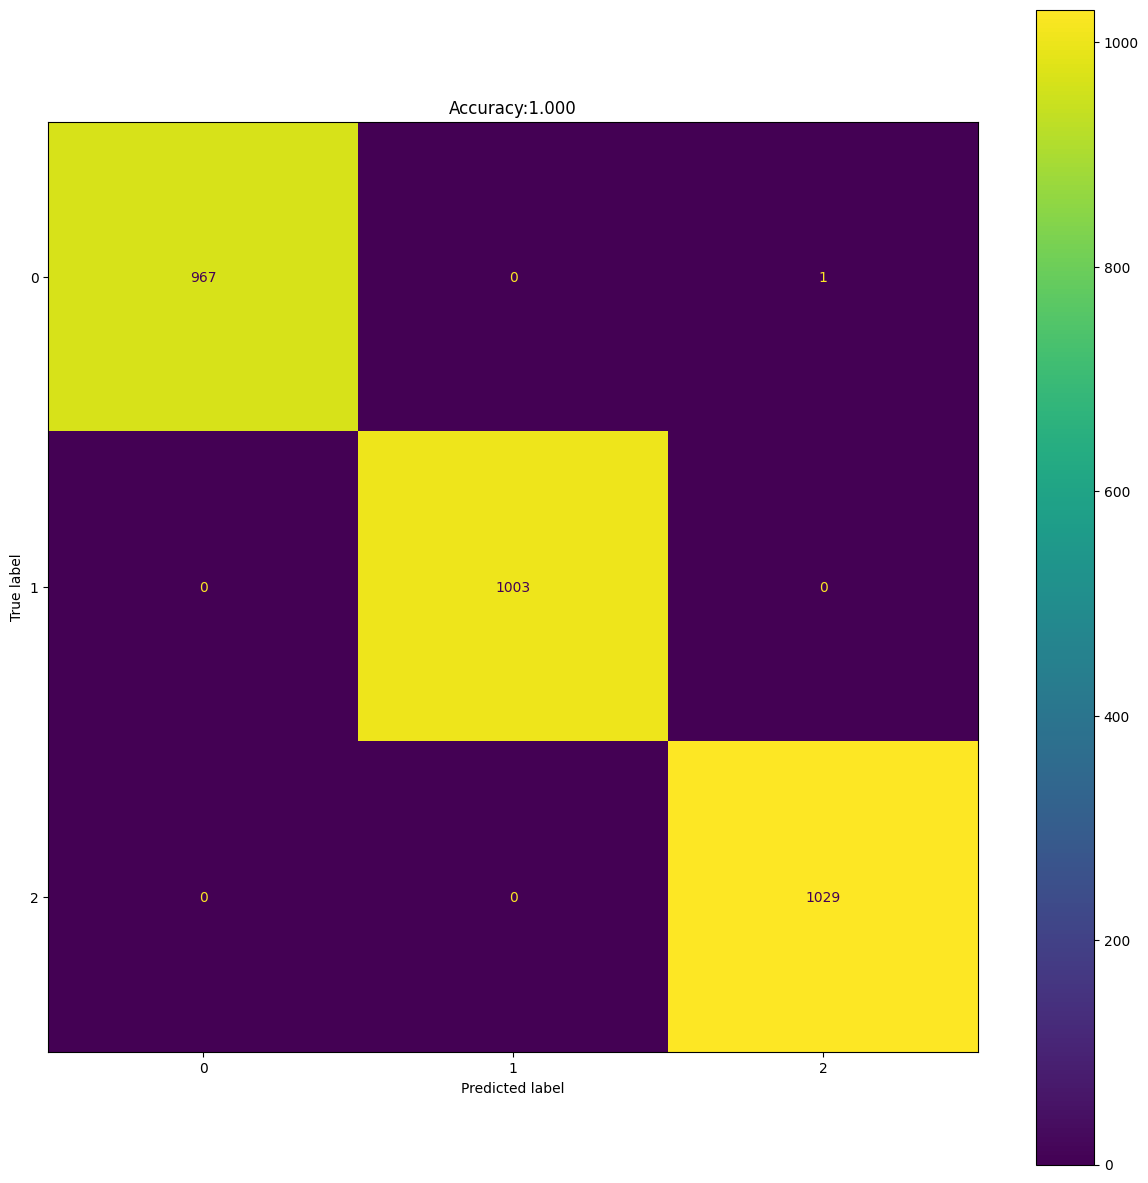

In [54]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')